# The Full Pipeline for Exploiting Loop-Like Exercices in The Classification of Parkinson's Disease

## Content

1. Data Preparation
    1. Data Collection
    2. Preprocessing
    3. Splitting
1. Exploratory Data Analysis
    1. Basic Statistical Measures
    2. Plotting
1. Data Manipulation
    1. Feature Extraction
    2. Normalization
1. Model Architecture Design
1. Model Compilation
1. Model Training
1. Model Tuning and Evaluation

## 1. Data Preparation

### A. Data Collection

<p>In this phase, the data is loaded from the files that were created by the data collection system.</p>
<p>This is done using packages and modules specifically designed for the hierarchical structure of this data.</p>
<p>The module responsible for data collection also performs some basic preprocessing tasks, such as removing invalid data that shouldn't exist (e.g. letters in numeric values).</p>
<p>The data concerning the cursive <em>"L"</em> task in the French language is loaded.</p>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 13)
from dataaccess.filedatareader import FileDataReader

reader = FileDataReader('../data/Patients Records 05_04_2019')
info, data = reader.load_french(tasks=[3])

Loading the data, please wait.
Data loaded successfully.


Here is how the 'info' dataframe looks like: 

In [2]:
info

,Age,Birth Date,Gender,Hand,Vision Problems,Vision Problem Comment,...,Firstname,Level of Studies,The Person Writes,Mother Toungue,French Level,Pathology
ID,,,,,,,,,,,,,
EL IDRISSI NOUZHA,59,1/1/1958,Female,Right,No,None,...,NaN,NaN,NaN,NaN,NaN,NaN
JIDAR ABBES,63,NaN,Male,Right,NaN,NaN,...,Abbes,Higher education,6-7 times per week,Amharic,Advanced,None
BAAZI LATIFA,37,NaN,Female,Right,NaN,NaN,...,Latifa,HighSchool,Everyday - Many times per day,Amharic,Medium,None
AFERANE ELHASSANE,56,NaN,Male,Right,NaN,NaN,...,Elhassane,Higher education,6-7 times per week,Amharic,Advanced,None
NEZHA TOUGHAT,57,1/1/1961,Female,Right,No,None,...,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TALBIOUI RAJAA,30,NaN,Female,Right,NaN,NaN,...,Rajaa,Higher education,Everyday - Many times per day,Amharic,Advanced,None
AYOUB NEDBOUR,23,13/2/1993,Male,Right,No,None,...,NaN,NaN,NaN,NaN,NaN,NaN
MEHDAOUI MOHAMED,69,1/1/1948,Male,Right,No,None,...,NaN,NaN,NaN,NaN,NaN,NaN


And then the 'data' dataframe:

In [3]:
df = data.copy()
df = df.reset_index()
df = df.set_index(["ID", 'Language', 'Task', 'Time']).sort_index()
df

X      Y  P    Az   Al
ID            Language Task Time                            
ABABOU SALMA  French   3    0      6605  30983  0  1800  890
                            8      6566  31243  0  1800  890
                            15     6523  31370  0  1800  890
                            23     6479  31486  0  1800  890
                            30     6429  31580  0  1800  890
...                                 ...    ... ..   ...  ...
ZYATE TAOUFIK French   3    9940  20862  39678  0  1350  620
                            9948  20862  39678  0  1350  620
                            9955  20862  39678  0  1350  620
                            9963  20862  39678  0  1350  620
                            9970  20862  39678  0  1350  620

[294440 rows x 5 columns]

### B. Preprocessing

In the preprocessing phase, the following steps are carried:

- Handling missing data.
- Keeping only the data of healthy controls (HCs) and parkinson's disease patients (PDs).
- Count, age and gender matching between HCs and PD.

In our case, since there are no missing values in the data concerning Task 3 in French anyways, missing data is already handled.

Any exercice that doesn't correspond to an HC or a PD is removed (e.g. Alzheimers...).

HCs and PDs are matched in number, age and gender distrobution.

In [4]:
from datamanipulation.datageneration import get_pd_hc_only, match_age_gender_pd

info, data = get_pd_hc_only(info, data)
info, data = match_age_gender_pd(info, data)

### C. Splitting

In the splitting phase, I divide the dataset into training and test sets. The training set is used to train the model, and the test set (which is 30% of the data) evaluates the final model's performance, the test set is stratified to resemble the original data's label distrobution and gender distrobution across labels, in the train and test sets.

Since the data size is limiting, no validation set was left out, instead, 3-fold cross validation is used later.

In the following phases, only the training data is used.

In [5]:
from datamanipulation.datageneration import stratified_train_test_split

info_train, info_test, data_train, data_test = stratified_train_test_split(info, data, 'PD')

## 2. Exploratory Data Analysis

### A. Basic Statistical Measures

The full sample contains 20 PDs and 20 gender matched HCs, both groups are aged between 42 and 75.

In [6]:
df = info.groupby(['PD', 'Gender']).count()[["Hand"]]
df.columns = ['Count']
df

Count
PD Gender       
0  Female      6
   Male       14
1  Female      6
   Male       14

The training sample is also label, age and gender matched but with 15 PDs and 15 HCs:

In [7]:
df = info_train.groupby(['PD', 'Gender']).count()[["Hand"]]
df.columns = ['Count']
df

Count
PD Gender       
0  Female      4
   Male       11
1  Female      4
   Male       11

Another remark, is that the data is supposed to be spaced equaly in time (7ms and 8ms only), but there are a lot of images that contain data points that change eratically in time as follows, which is probably due to the pen leaving the tablet signal range:

In [8]:
hcs = data_train[data_train['PD']==0]
pds = data_train[data_train['PD']==1]

print('Example of non consistent time changes in a random image: ', list(pds.loc[pds.index.unique()[0]]['Time'].diff().where(lambda x: x > 8).dropna()))

Example of non consistent time changes in a random image:  [892.0, 944.0, 1028.0]


In [9]:
def calc_variable_time_change(df):
    count = 0
    for ix in df.index.unique():
        if len(df.loc[ix]['Time'].diff().unique()) > 3:
            count += 1
    return '{:.2f}'.format((count / df.index.unique().shape[0]) * 100) + "%"

print('The percentage of images that contain a variable time change:')
print('PDs:', calc_variable_time_change(pds))
print('HCs:', calc_variable_time_change(hcs))
print('All:', calc_variable_time_change(data_train))
print()

def calc_variable_time_change2(df):
    count = 0
    for ix in df.index.unique():
        count += df.loc[ix]['Time'].diff().where(lambda x: x > 8).dropna().shape[0]
    return '{:.2f}'.format((count / df.shape[0]) * 100) + "%"

print('The percentage of data points that contain a variable time change:')
print('PDs:', calc_variable_time_change2(pds))
print('HCs:', calc_variable_time_change2(hcs))
print('All:', calc_variable_time_change2(data_train))

The percentage of images that contain a variable time change:
PDs: 53.33%
HCs: 80.00%
All: 66.67%

The percentage of data points that contain a variable time change:
PDs: 0.09%
HCs: 0.19%
All: 0.13%


<p>Now let's compare some basic statistical measures between PDs and HCs.</p>
<p>Starting with PDs:</p>

In [10]:
pds.describe()

,PD,Time,X,Y,P,Az,Al
count,42501.0,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000
mean,1.0,13492.175949,10002.918943,34771.385003,330.816193,1461.586551,527.321240
std,0.0,9661.151164,6294.360427,3918.256305,272.679820,373.010194,138.508536
min,1.0,0.000000,9.000000,27782.000000,0.000000,0.000000,220.000000
25%,1.0,5750.000000,4269.000000,31303.000000,0.000000,1280.000000,440.000000
50%,1.0,11613.000000,6860.000000,32515.000000,344.000000,1450.000000,510.000000
75%,1.0,20097.000000,16126.000000,38913.000000,569.000000,1630.000000,580.000000
max,1.0,43269.000000,37611.000000,40629.000000,1023.000000,3460.000000,900.000000


Then HCs:

In [11]:
hcs.describe()

,PD,Time,X,Y,P,Az,Al
count,21990.0,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000
mean,0.0,6783.841246,10681.097362,34799.010869,361.860027,1431.819918,544.097317
std,0.0,4705.546423,6249.243011,4188.478545,278.311940,344.487984,131.820293
min,0.0,0.000000,289.000000,25219.000000,0.000000,0.000000,220.000000
25%,0.0,2915.250000,4531.250000,30986.000000,0.000000,1280.000000,480.000000
50%,0.0,6013.000000,11652.500000,34245.500000,408.000000,1380.000000,530.000000
75%,0.0,9962.000000,16293.000000,38989.750000,574.750000,1550.000000,580.000000
max,0.0,20723.000000,28173.000000,40629.000000,1023.000000,3420.000000,900.000000


- Time: The most important distinction when it comes to time, is that the mean, first quartile, median, third quartile and even the overall number of data points are all higher in PDs than in HCs, which indicates that generaly, PDs take more time to complete the exercices than HCs.
- Movement in X and Y: Smaller movements are also noticed in the X and Y axis for PDs, especially in the X axis (observed in the mean and quartiles).
- The pressure is also signicantly less in PDs than in HCs, with a huge difference in the median.
- When it comes to altitude, HCs seem to hold the pen a little bit straighter than PDs.

The Pearson's correlation matrix for all participants:

In [12]:
data_train.corr(numeric_only=True)

,PD,Time,X,Y,P,Az,Al
PD,1.000000,0.357389,-0.051133,-0.003264,-0.053512,0.038786,-0.058262
Time,0.357389,1.000000,0.322594,0.569053,0.009281,0.037580,-0.168064
X,-0.051133,0.322594,1.000000,0.072040,0.033914,-0.041263,0.026675
Y,-0.003264,0.569053,0.072040,1.000000,-0.056491,-0.085804,-0.262830
P,-0.053512,0.009281,0.033914,-0.056491,1.000000,-0.058666,-0.128959
Az,0.038786,0.037580,-0.041263,-0.085804,-0.058666,1.000000,0.136818
Al,-0.058262,-0.168064,0.026675,-0.262830,-0.128959,0.136818,1.000000


- There doesn't seem to be any strong correlation between any of the features, except for the time's correlation with X and Y which is normal considering the direction of writing.

### B. Plotting

First let's view the handwriting differences:

In [13]:
import numpy as np

def rand_imgs(num):
    rand_hcs = []
    rand_pds = []
    for i in range(num):
        rand_hcs.append(np.random.randint(0, len(hcs.index.unique())))
        rand_pds.append(np.random.randint(0, len(pds.index.unique())))
    hc_images = []
    pd_images = []
    for i, j in zip(rand_hcs, rand_pds):
        hc_images.append(hcs.loc[hcs.index.unique()[i]])
        pd_images.append(pds.loc[pds.index.unique()[j]])
    return hc_images, pd_images

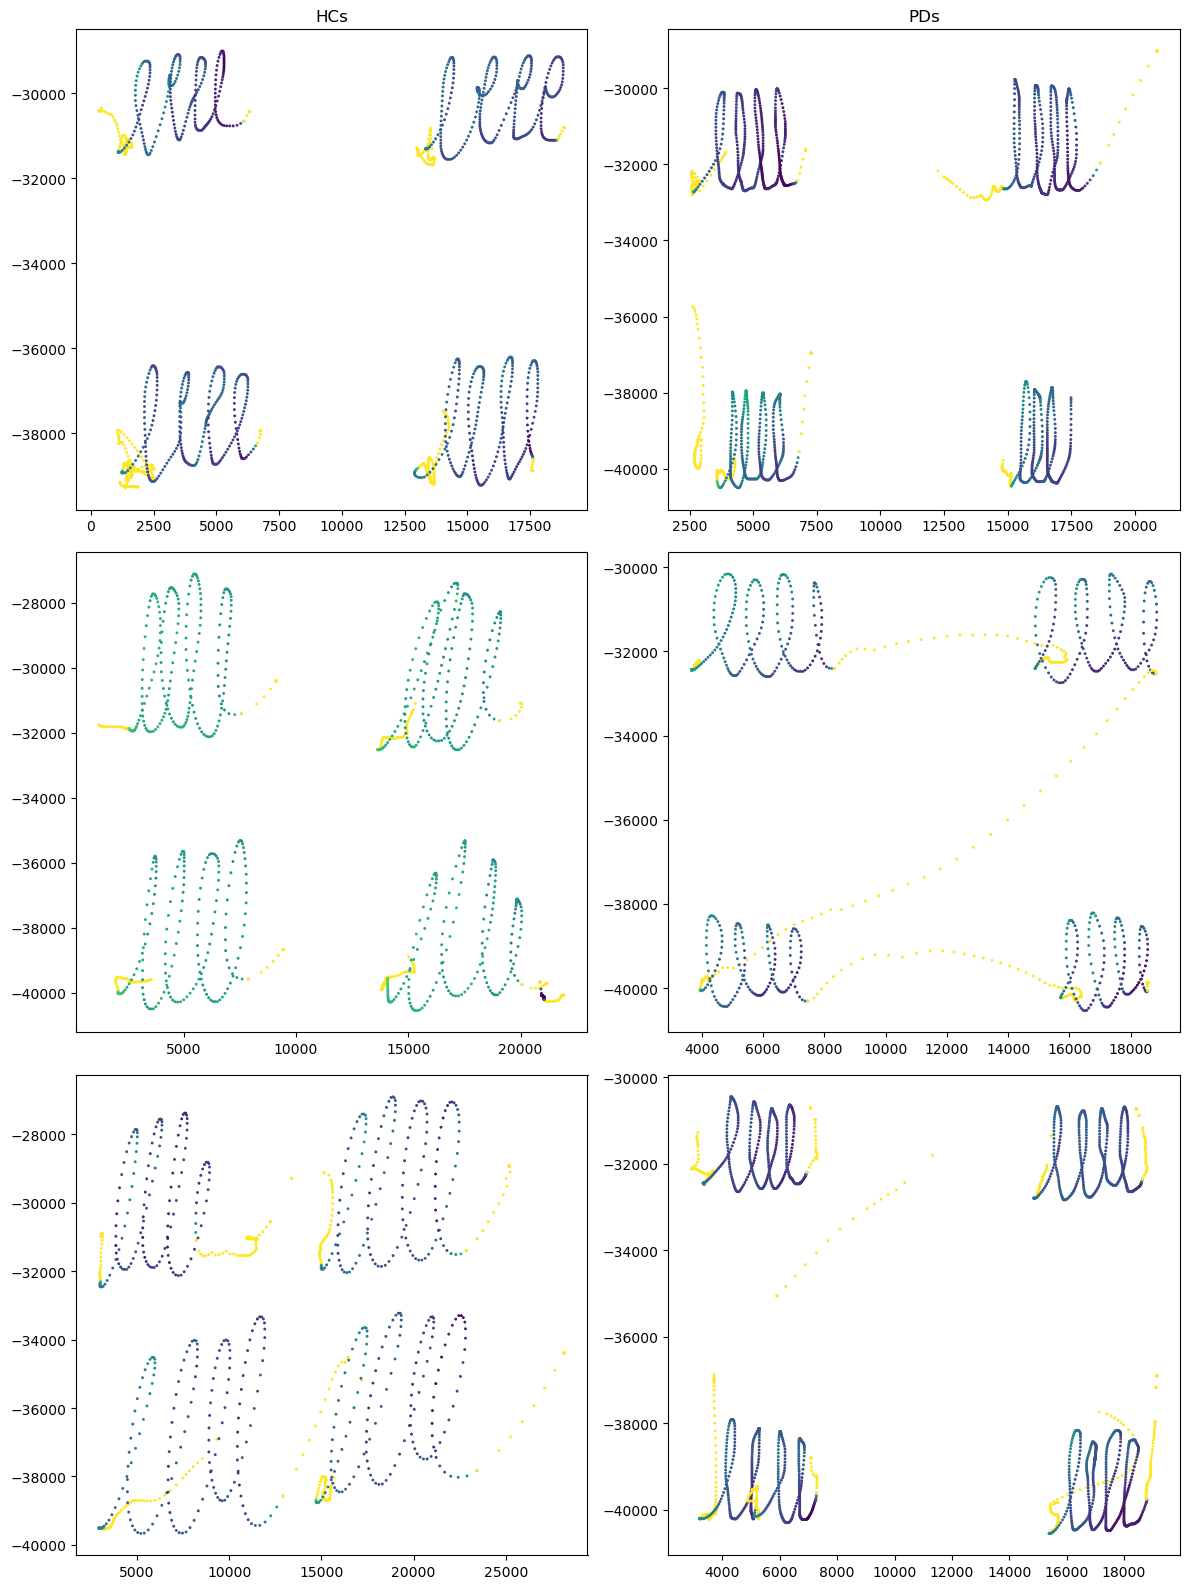

In [14]:
import matplotlib.pyplot as plt

rand_hcs, rand_pds = rand_imgs(3)

plt.close()

fig = plt.figure(figsize=(12, 16))

hc_plot1 = plt.subplot2grid((3, 2), (0, 0))
hc_plot2 = plt.subplot2grid((3, 2), (1, 0))
hc_plot3 = plt.subplot2grid((3, 2), (2, 0))

pd_plot1 = plt.subplot2grid((3, 2), (0, 1))
pd_plot2 = plt.subplot2grid((3, 2), (1, 1))
pd_plot3 = plt.subplot2grid((3, 2), (2, 1))

hc_plot1.set_title('HCs')
hc_plot1.scatter(rand_hcs[0]['X'], rand_hcs[0]['Y'] *-1, c=rand_hcs[0]['P']*-1, s=1.2)
hc_plot2.scatter(rand_hcs[1]['X'], rand_hcs[1]['Y'] *-1, c=rand_hcs[1]['P']*-1, s=1.2)
hc_plot3.scatter(rand_hcs[2]['X'], rand_hcs[2]['Y'] *-1, c=rand_hcs[2]['P']*-1, s=1.2)

pd_plot1.set_title('PDs')
pd_plot1.scatter(rand_pds[0]['X'], rand_pds[0]['Y'] *-1, c=rand_pds[0]['P']*-1, s=1.2)
pd_plot2.scatter(rand_pds[1]['X'], rand_pds[1]['Y'] *-1, c=rand_pds[1]['P']*-1, s=1.2)
pd_plot3.scatter(rand_pds[2]['X'], rand_pds[2]['Y'] *-1, c=rand_pds[2]['P']*-1, s=1.2)

plt.tight_layout()
plt.show()

- It's very clear that the HC's handwriting (HW) and in-air movements are far smoother than that of the PD, in mathematical terms, this means that there is some volatility in the change in X and Y, especialy observed in the X-axis.
- This information can be further exploited with some extracted features such the change in X and Y, velocity, acceleration and jerk.
- There is also a slight change in pressure, illustrated by the colors, where the bluer the color the higher the pressure, PDs show less pressure which is especially noticeable in the top of each "L" as time goes on, this may be due to fatigue in PDs.
- Then the change in pressure and the rate of change in pressure could show these patterns more clearly.
- There is also noticeable micrographia in the X and Y axes, and a higher density of points in PDs, which indicates slower movement and more time spent in HW.

## 3. Data Manipulation

### A. Feature Extraction

In this phase, we perform feature extraction and produce features that may be of value, as discovered in the exploratory data analysis.

Since the data is represented as images, only the features that can have a value at each datapoint are used, so features that produce vectors of smaller size than the number of data points per image, or features that produce one scalar value per image, are ignored.

The following are the extracted features:

1. Displacement in x and y.
1. Distance in x, y and both.
1. Velocity in x, y and both.
1. Acceleration in x, y and both.
1. Jerk in x, y and both.
1. Rate of change (ROC) in pressure.
1. ROC in Alt.
1. ROC in Az.
1. The slope (ROC of y over x).

In [16]:
from datamanipulation.extraction import *

extracted_train = extract_features(data_train)

Started extracting features.
The following features were extracted successfully: ['Displacement x', 'Displacement y', 'Distance x', 'Distance y', 'Distance x-y', 'Velocity x', 'Velocity y', 'Velocity x-y', 'Acceleration x', 'Acceleration y', 'Acceleration x-y', 'Jerk x', 'Jerk y', 'Jerk x-y', 'ROC p / time', 'ROC al / time', 'ROC az / time', 'Slope']
Number of features: 18


Let's explore the new features and compare between PDs and HCs, starting with PDs:

In [84]:
extracted_train[extracted_train['PD']==1].describe()

,PD,Time,X,Y,P,Az,Al,Displacement x,Displacement y,Distance x,Distance y,Distance x-y,Velocity x,Velocity y,Velocity x-y,Acceleration x,Acceleration y,Acceleration x-y,Jerk x,Jerk y,Jerk x-y,ROC p / time,ROC al / time,ROC az / time,Slope
count,42501.0,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000,42501.000000
mean,1.0,13492.175949,10002.918943,34771.385003,330.816193,1461.586551,527.321240,7.157079,13.229195,34.884803,50.560128,70.300675,1.007439,0.230435,7.626587,0.004149,-0.000609,0.005428,0.002398,0.000104,0.001579,-0.002936,-0.005459,0.127322,0.275495
std,0.0,9661.151164,6294.360427,3918.256305,272.679820,373.010194,138.508536,317.594415,613.462834,315.753796,611.518828,687.376753,33.555877,13.457288,36.659681,6.398433,2.121835,6.838602,1.567865,0.500443,1.597587,2.620058,1.210463,19.570091,34.094830
min,1.0,0.000000,9.000000,27782.000000,0.000000,0.000000,220.000000,-18787.000000,-7139.000000,0.000000,0.000000,0.000000,-2196.285714,-508.750000,0.000000,-313.755102,-120.857143,-290.809906,-69.233236,-32.372449,-78.353100,-67.571429,-40.000000,-488.571429,-261.000000
25%,1.0,5750.000000,4269.000000,31303.000000,0.000000,1280.000000,440.000000,-9.000000,-23.000000,2.000000,5.000000,13.892444,-1.142857,-3.000000,1.829464,-0.044643,-0.078125,-0.091543,-0.009885,-0.018933,-0.022022,-0.250000,0.000000,0.000000,-2.080000
50%,1.0,11613.000000,6860.000000,32515.000000,344.000000,1450.000000,510.000000,0.000000,0.000000,12.000000,24.000000,34.132096,0.000000,0.000000,4.571429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000638,0.000000,0.000000,0.000000,-0.235023
75%,1.0,20097.000000,16126.000000,38913.000000,569.000000,1630.000000,580.000000,15.000000,25.000000,30.000000,54.000000,66.287254,2.125000,3.285714,8.830605,0.046875,0.075893,0.098291,0.010614,0.019133,0.026207,0.500000,0.000000,0.000000,0.600000
max,1.0,43269.000000,37611.000000,40629.000000,1023.000000,3460.000000,900.000000,15184.000000,34635.000000,18787.000000,34635.000000,36709.845900,1696.857143,846.000000,2352.104247,271.895089,120.265306,336.014892,73.206274,19.796921,48.002127,54.428571,37.500000,475.714286,160.000000


Then HCs:

In [81]:
extracted_train[extracted_train['PD']==0].describe()

,PD,Time,X,Y,P,Az,Al,Displacement x,Displacement y,Distance x,Distance y,Distance x-y,Velocity x,Velocity y,Velocity x-y,Acceleration x,Acceleration y,Acceleration x-y,Jerk x,Jerk y,Jerk x-y,ROC p / time,ROC al / time,ROC az / time,Slope
count,21990.0,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000,21990.000000
mean,0.0,6783.841246,10681.097362,34799.010869,361.860027,1431.819918,544.097317,13.396226,26.385493,64.557208,95.875443,131.396294,2.012189,0.644121,14.223164,0.055152,-0.000050,0.015130,0.011472,0.000367,0.005174,-0.018149,-0.026107,0.042481,-1.391357
std,0.0,4705.546423,6249.243011,4188.478545,278.311940,344.487984,131.820293,462.934851,846.099726,458.606935,841.063882,955.930617,44.346447,27.339278,58.107775,8.971658,4.392682,10.719522,2.258566,1.024832,2.499424,3.643026,1.651859,18.110038,35.820901
min,0.0,0.000000,289.000000,25219.000000,0.000000,0.000000,220.000000,-19380.000000,-1829.000000,0.000000,0.000000,0.000000,-2078.625000,-180.571429,0.000000,-269.632653,-168.673469,-324.292340,-56.131059,-48.466472,-90.848627,-99.571429,-33.750000,-488.571429,-357.000000
25%,0.0,2915.250000,4531.250000,30986.000000,0.000000,1280.000000,480.000000,-15.000000,-40.000000,7.000000,7.000000,25.079872,-2.000000,-5.285714,3.358757,-0.087054,-0.156250,-0.160714,-0.019412,-0.032434,-0.037041,-0.428571,0.000000,0.000000,-2.000000
50%,0.0,6013.000000,11652.500000,34245.500000,408.000000,1380.000000,530.000000,0.000000,0.000000,25.000000,40.000000,59.426424,0.000000,0.000000,7.903758,0.000000,0.000000,0.000000,0.000000,0.000000,0.002190,0.000000,0.000000,0.000000,-0.272727
75%,0.0,9962.000000,16293.000000,38989.750000,574.750000,1550.000000,580.000000,35.000000,41.000000,56.000000,96.000000,121.000000,4.625000,5.428571,16.175597,0.094388,0.140625,0.168367,0.021006,0.032890,0.047319,0.714286,0.000000,0.000000,0.349457
max,0.0,20723.000000,28173.000000,40629.000000,1023.000000,3420.000000,900.000000,10841.000000,38898.000000,19380.000000,38898.000000,39026.793719,1548.714286,1194.142857,2296.835901,292.951531,170.591837,319.066360,78.624772,24.370262,45.580909,84.571429,62.857143,488.571429,220.000000


- Most of the extracted kinematic and pressure features in HCs show significantly higher means, 2nd and 3rd quartiles and inter-quartile range.
- The extracted inclination features have a first, second and third quartiles of 0, which indicates that a significant portion of the data values in the lower half of the dataset are zero. This suggests that there may be a concentration of zero values within the dataset, particularly in the lower 50% of the data distribution (In our case 74% of data points have an ROC of altitude of 0, and 68% of data points have an ROC of azimuth of 0).
- The slope in PDs has a significantly higher mean, 2nd and 3rd quartiles and inter-quartile range.

### B. Normalization

In this phase we normalize the data so that the neural network can converge efficiently. 

First let's visualize the distrobution of the data values using a density plot:

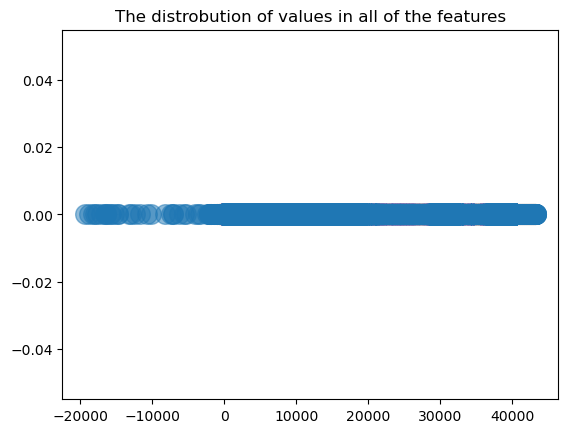

In [99]:
plt.scatter(extracted_train.values.reshape(-1), np.zeros(extracted_train.values.reshape(-1).shape[0]), alpha=0.5, s=200)
plt.title("The distrobution of values in all of the features")
plt.show()

The distrobution is clearly even with a small region of a slightly lower density of points, which means that global standardization using Z-Score Scaling is optimal.

In [101]:
standardized_train = (extracted_train - extracted_train.mean()) / extracted_train.std()

Now let's plot a few normalized, and non normalized features just for the sake of comparison:

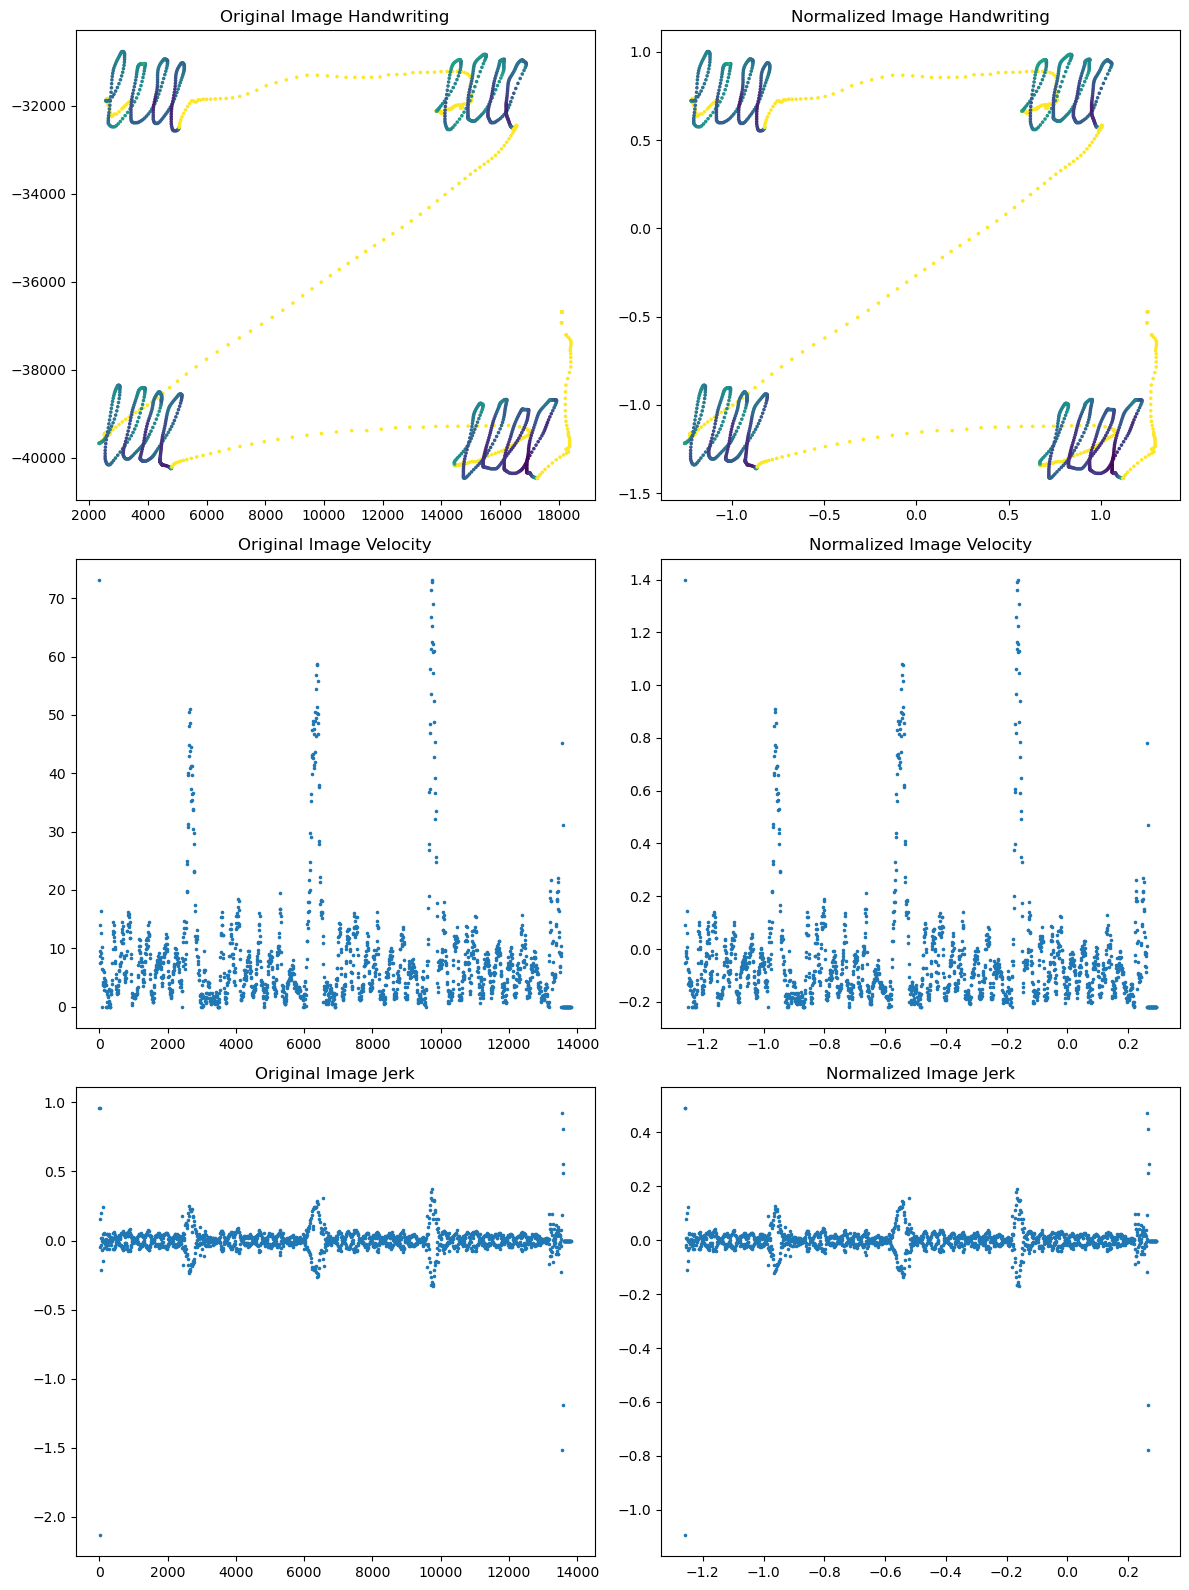

In [122]:
img_ix = standardized_train.index.unique()[np.random.randint(0, high=standardized_train.index.unique().shape[0] - 1)]

plt.close()

fig = plt.figure(figsize=(12, 16))

og_plot1 = plt.subplot2grid((3, 2), (0, 0))
og_plot2 = plt.subplot2grid((3, 2), (1, 0))
og_plot3 = plt.subplot2grid((3, 2), (2, 0))

norm_plot1 = plt.subplot2grid((3, 2), (0, 1))
norm_plot2 = plt.subplot2grid((3, 2), (1, 1))
norm_plot3 = plt.subplot2grid((3, 2), (2, 1))

og_plot1.set_title('Original Image Handwriting')
og_plot1.scatter(extracted_train.loc[img_ix]['X'], extracted_train.loc[img_ix]['Y'] * -1, s=2.5, c=extracted_train.loc[img_ix]['P'] * -1)
og_plot2.set_title('Original Image Velocity')
og_plot2.scatter(extracted_train.loc[img_ix]['Time'], extracted_train.loc[img_ix]['Velocity x-y'], s=2.5)
og_plot3.set_title('Original Image Jerk')
og_plot3.scatter(extracted_train.loc[img_ix]['Time'], extracted_train.loc[img_ix]['Jerk x-y'], s=2.5)


norm_plot1.set_title('Normalized Image Handwriting')
norm_plot1.scatter(standardized_train.loc[img_ix]['X'], standardized_train.loc[img_ix]['Y'] * -1, s=2.5, c=standardized_train.loc[img_ix]['P'] * -1)
norm_plot2.set_title('Normalized Image Velocity')
norm_plot2.scatter(standardized_train.loc[img_ix]['Time'], standardized_train.loc[img_ix]['Velocity x-y'], s=2.5)
norm_plot3.set_title('Normalized Image Jerk')
norm_plot3.scatter(standardized_train.loc[img_ix]['Time'], standardized_train.loc[img_ix]['Jerk x-y'], s=2.5)


plt.tight_layout()
plt.show()

## 4. Model Architecture Design

RNN
b.aouragh@emsi.ma
i.aouraghe@emsi.ma
https://github.com/IAouraghe